## **Stock Price Predictor - Project**

In [2]:
import pandas as pd
import numpy as np

import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stocks = input("Enter the code of the stock:- ")
data = yf.download(stocks, "2005-01-01", "2023-06-18", auto_adjust=True)
data.head()

Enter the code of the stock:- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2005-01-03,5.949,5.949,5.71,5.790,23383
2005-01-04,5.780,5.990,5.77,5.902,24801
2005-01-05,5.930,5.978,5.76,5.833,23075
2005-01-06,5.835,6.070,5.76,6.049,26666
2005-01-07,6.020,6.100,5.90,6.001,31121


In [4]:
data.shape

(4646, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4646 entries, 2005-01-03 to 2023-06-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4646 non-null   float64
 1   High    4646 non-null   float64
 2   Low     4646 non-null   float64
 3   Close   4646 non-null   float64
 4   Volume  4646 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 217.8 KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,4646.000000,4646.000000,4646.000000,4646.000000,4646.000000
mean,4.489484,4.592929,4.382381,4.482476,116010.846535
std,2.379693,2.444985,2.315569,2.377700,59958.390176
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.787000,2.838250,2.736250,2.781250,69065.250000
50%,3.764500,3.838500,3.680000,3.754000,113111.000000
75%,5.708750,5.878250,5.547750,5.702250,152560.000000
max,15.160000,15.780000,14.851000,15.378000,459196.000000


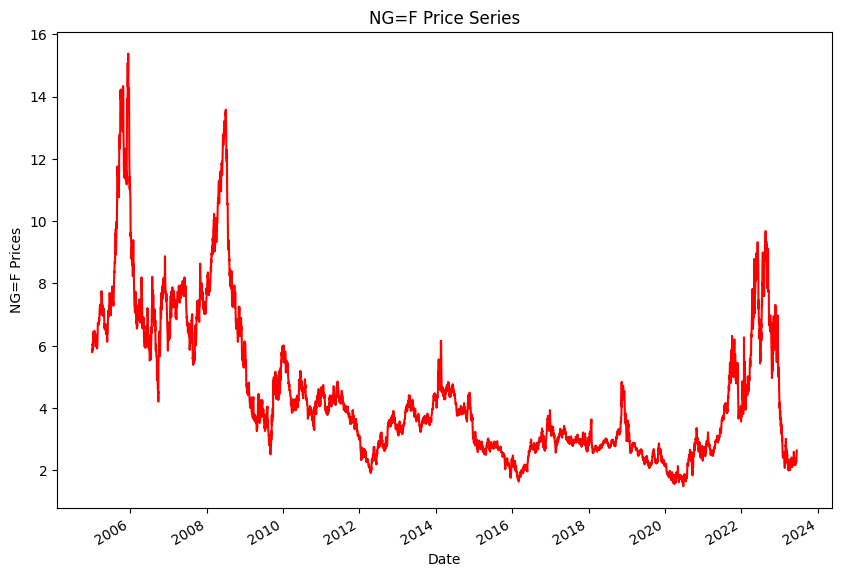

In [7]:
data.Close.plot(figsize = (10,7), color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(format(stocks)))
plt.show()

<ipython-input-8-7576e4f36f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

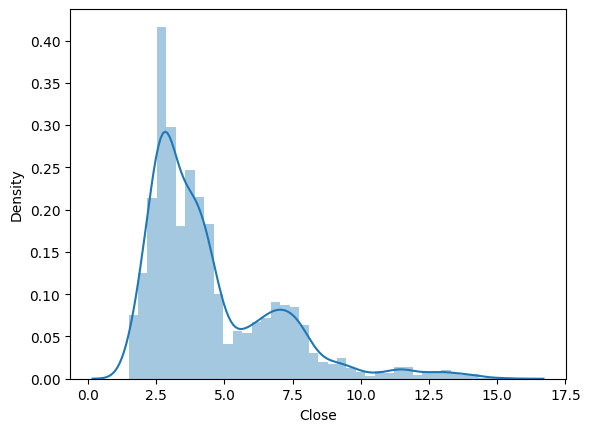

In [8]:
sns.distplot(data["Close"])

<ipython-input-9-5080fb3532bc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Low'])


<Axes: xlabel='Low', ylabel='Density'>

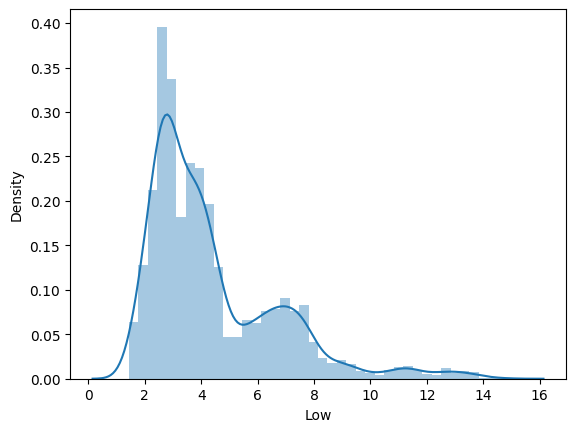

In [9]:
sns.distplot(data['Low'])

<ipython-input-10-20e345d79dca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Open'])


<Axes: xlabel='Open', ylabel='Density'>

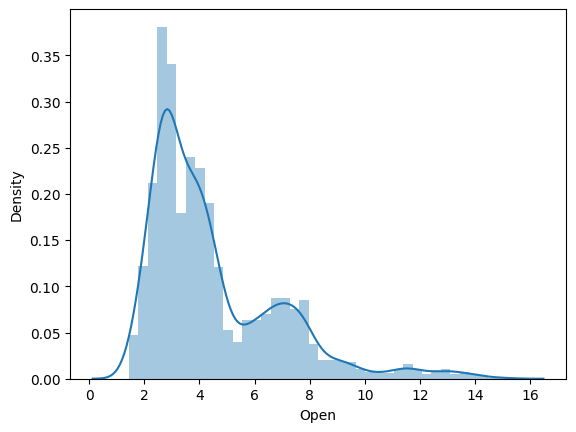

In [10]:
sns.distplot(data['Open'])

In [11]:
x = data.drop('Close', axis = 1)
y = data['Close']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3716, 4)
(930, 4)
(3716,)
(930,)


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)

In [13]:
from joblib.parallel import sqrt
from sklearn.metrics import mean_squared_error, r2_score

def calculateMetrics(y_test, y_pred):
  mse = mean_squared_error(y_test,y_pred)
  rmse = sqrt(mse)
  r_score = r2_score(y_test, y_pred)

  print("MSE - ", mse)
  print("RMSE - ", rmse)
  print("r2_score - ", r_score)

calculateMetrics(y_test, pred1)

MSE -  0.00446455736785813
RMSE -  0.06681734331637355
r2_score -  0.9992514207261726


In [14]:
from sklearn.linear_model import Lasso, Ridge
la = Lasso().fit(x_train, y_train)
ri = Ridge().fit(x_train, y_train)

la_p = la.predict(x_test)
ri_p = ri.predict(x_test)

In [16]:
calculateMetrics(y_test, ri_p)

MSE -  0.004475791745010224
RMSE -  0.06690135831962027
r2_score -  0.9992495370406921


In [17]:
calculateMetrics(y_test, la_p)

MSE -  0.24750214738370002
RMSE -  0.4974958767504511
r2_score -  0.9585009302169385


In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C' : [0.1, 1, 10, 100, 1000],
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['rbf']
              }

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.098 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.120 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.083 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.062 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.101 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.097 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.119 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.081 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.060 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.099 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.094 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
svr = SVR(C=10, gamma=0.01, kernel = 'rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)